# HW Week 3

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [2]:
weather = pd.read_csv('data/weather_2012.csv', parse_dates=True, index_col='Date/Time')

In [4]:
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [5]:
weather.tail()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


Let's keep track of the original column names with a variable:

In [6]:
original_columns = weather.columns
original_columns

Index(['Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)', 'Wind Spd (km/h)',
       'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')

## I don't like the column Weather, so renaming it:



In [7]:
weather = weather.rename(columns={"Weather": "Desc"})
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Desc
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## Q1: Rename other columns to be shorter names that are easier to work with. Ex; 'Temp (C)' -> Temp  

In [8]:
#YOUR CODE HERE 

weather = weather.rename(columns={"Temp (C)": "Temp", "Dew Point Temp (C)": "DPTemp", "Rel Hum (%)": "Hum", "Wind Spd (km/h)": "WindSpd", "Visibility (km)": "Visibility" , "Stn Press (kPa)": "StnPress"})
weather.head()

,Temp,DPTemp,Hum,WindSpd,Visibility,StnPress,Desc
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## Q2 Plot the avg temperature by month.  (There are several ways to do this.)

In [9]:
#YOUR CODE HERE 
avg_month = weather.copy()
avg_month['Month'] = avg_month.index.month
avg_month.head()

,Temp,DPTemp,Hum,WindSpd,Visibility,StnPress,Desc,Month
Date/Time,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1


<AxesSubplot:xlabel='Month'>

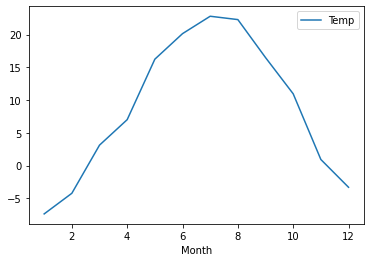

In [10]:
avg_month[['Temp', 'Month']].groupby("Month").aggregate("mean").plot()


## Q3: Find the date and then look up the row for the days with max and min temperatures. (Look back at the Timeseries NB for where I got the max and then looked up the date on the index.)

In [12]:
#YOUR CODE HERE 
maxi = weather["Temp"].idxmax()
maxi

Timestamp('2012-06-21 15:00:00')

In [11]:
mini = weather['Temp'].idxmin()
mini

Timestamp('2012-01-15 08:00:00')

In [12]:
maxi_index = weather.index.get_loc(maxi)
maxi_index

4143

In [14]:
weather.loc[maxi]

Temp                    33
DPTemp                  19
Hum                     44
WindSpd                 24
Visibility            24.1
StnPress             100.2
Desc          Mainly Clear
Name: 2012-06-21 15:00:00, dtype: object

In [14]:
mini_index = weather.index.get_loc(mini)
mini_index

344

In [15]:
weather.iloc[mini_index]

Temp           -23.3
DPTemp         -28.5
Hum               62
WindSpd            7
Visibility      24.1
StnPress      102.45
Desc           Clear
Name: 2012-01-15 08:00:00, dtype: object

## Q4: Get the median values per month. Save that as a new dataframe.
Hint : Use groupby

In [16]:
#YOUR CODE HERE 

median_month = avg_month.groupby('Month').aggregate(np.median)
median_month

,Temp,DPTemp,Hum,WindSpd,Visibility,StnPress
Month,,,,,,
1,-7.05,-12.20,68.0,17.0,24.1,101.015
2,-4.10,-8.80,69.0,15.0,25.0,101.140
3,2.60,-2.50,63.5,13.0,25.0,101.480
4,6.30,-1.30,55.0,17.0,25.0,100.770
5,16.05,8.60,63.0,11.0,25.0,101.210
6,19.60,11.70,62.0,15.0,25.0,100.785
7,22.90,14.95,62.5,11.0,25.0,100.835
8,22.20,16.55,68.0,13.0,25.0,100.840
9,16.10,10.20,73.0,13.0,25.0,101.150


## Q5: Plot the humidity using the original dataframe weather, and then plot the humidity from  the month one you just made.   

<AxesSubplot:xlabel='Date/Time'>

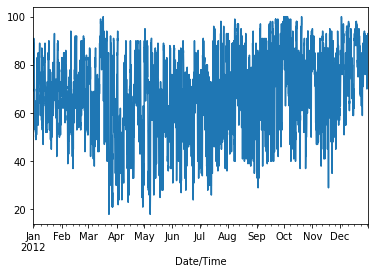

In [17]:
#YOUR CODE HERE 

weather['Hum'].plot()

<AxesSubplot:xlabel='Month'>

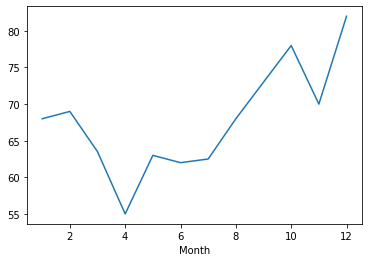

In [18]:
median_month['Hum'].plot()

## Q6: What is the weather description (text) for the day and time when the wind speed is the highest?

In [19]:
windmax = weather['WindSpd'].idxmax()
windmax_ind = weather.index.get_loc(windmax)
weather[["WindSpd", "Desc"]].iloc[windmax_ind]

WindSpd               83
Desc       Mostly Cloudy
Name: 2012-01-18 01:00:00, dtype: object

## Q7: What are the counts of all the weather descriptions?

In [20]:
weather['Desc'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

## Q8: find the rows that contain "Snow" and plot the temperature for those rows using a bar chart

<AxesSubplot:xlabel='Date/Time'>

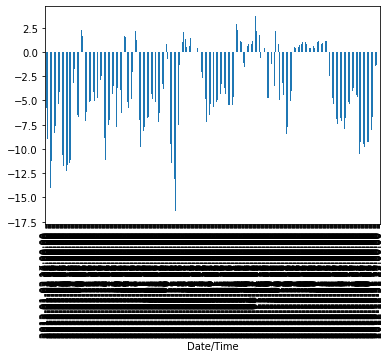

In [21]:
#YOUR CODE HERE 

Desc_snow = weather[weather['Desc'].str.contains("Snow")]
Desc_snow['Temp'].plot(kind='bar') 


## Q9: Group by the weather description terms and use np.mean as your aggregate. Show the head.

In [22]:
#YOUR CODE HERE 

weather_desc = weather.groupby('Desc').aggregate(np.mean)
weather_desc.head()

,Temp,DPTemp,Hum,WindSpd,Visibility,StnPress
Desc,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000


## Q10: Sort the dataframe from Q10 by Temperature Ascending and 
plot the top 5 Temperature values as a bar chart.

In [23]:
#YOUR CODE HERE 
# Took the dataframe from Q9, as Q10 is this question. 

weather_desc = weather_desc.sort_values(by="Temp",ascending=True)
weather_desc.head()

,Temp,DPTemp,Hum,WindSpd,Visibility,StnPress
Desc,,,,,,
"Snow Showers,Fog",-10.675000,-11.90,90.750000,13.750000,7.025,101.292500
Freezing Fog,-7.575000,-9.25,87.750000,4.750000,0.650,102.320000
Freezing Drizzle,-5.657143,-8.00,83.571429,16.571429,9.200,100.202857
Moderate Snow,-5.525000,-7.25,87.750000,33.750000,0.750,100.275000
"Moderate Snow,Blowing Snow",-5.450000,-6.50,92.500000,40.000000,0.600,100.570000


<AxesSubplot:xlabel='Desc'>

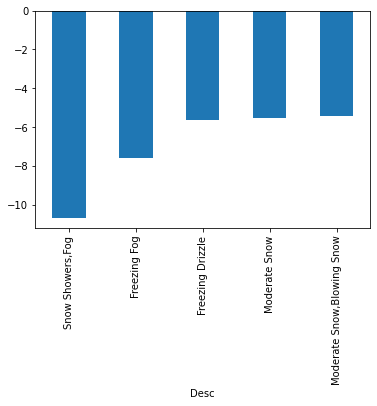

In [24]:
weather_desc["Temp"].head().plot(kind="bar")

## Q11: Get a list of the unique weather terms that appear in the description column.

In [25]:
#YOUR CODE HERE 

weather['Desc'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

## Q12: Split the Description elements by comma (but don't make multiple columns for them).

In [26]:
#YOUR CODE HERE 

weather['Desc'].str.split(",")

Date/Time
2012-01-01 00:00:00                      [Fog]
2012-01-01 01:00:00                      [Fog]
2012-01-01 02:00:00    [Freezing Drizzle, Fog]
2012-01-01 03:00:00    [Freezing Drizzle, Fog]
2012-01-01 04:00:00                      [Fog]
                                ...           
2012-12-31 19:00:00                     [Snow]
2012-12-31 20:00:00                     [Snow]
2012-12-31 21:00:00                     [Snow]
2012-12-31 22:00:00                     [Snow]
2012-12-31 23:00:00                     [Snow]
Name: Desc, Length: 8784, dtype: object

## Q13: Get the values from the split descriptions you just got (hint: values) and figure out how to make a Counter object to see which ones occur most often. Call most_common on the Counter.

Another hint: flatten a list of lists by using this magic spell that I look up every time:
```
flatlist = [item for sublist in nested_list for item in sublist]
```

in other words, if nested_list is [[2,3], [32,55], [4]], then
the flat version will be [2,3,32,55,4].  It's flat because it has no lists inside it!

In [16]:
#YOUR CODE HERE 
count_objects = weather['Desc'].str.split(",").values
count_objects

array([list(['Fog']), list(['Fog']), list(['Freezing Drizzle', 'Fog']),
       ..., list(['Snow']), list(['Snow']), list(['Snow'])], dtype=object)

In [17]:
count_obj = [tonia for  konsti in count_objects for tonia in konsti]
count_obj

['Fog',
 'Fog',
 'Freezing Drizzle',
 'Fog',
 'Freezing Drizzle',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Mostly Cloudy',
 'Cloudy',
 'Rain',
 'Rain',
 'Cloudy',
 'Cloudy',
 'Rain Showers',
 'Cloudy',
 'Rain Showers',
 'Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mainly Clear',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Snow Showers',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Snow Showers',
 'Snow Showers',
 'Cloudy',
 'Snow Showers',
 'Snow Showers',
 'Cloudy',
 'Snow Showers',
 'Snow Showers',
 'Cloudy',
 'Snow Showers',
 'Snow Showers',
 'Snow',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Cloudy',
 'Mostly Cloudy',
 'Mainly Clear',
 'Mainly Clear',
 'Mainly Clear',
 'Mainly Clear',
 'Mainly Clear',
 'Mainly Clear',
 'Mainly Clear',
 'Clear',
 'Mainly Cl

In [29]:
Counter(count_obj).most_common(10)

[('Mainly Clear', 2106),
 ('Mostly Cloudy', 2069),
 ('Cloudy', 1728),
 ('Clear', 1326),
 ('Snow', 508),
 ('Rain', 454),
 ('Fog', 422),
 ('Rain Showers', 210),
 ('Drizzle', 139),
 ('Snow Showers', 66)]